<a href="https://colab.research.google.com/github/EpziTecho/ProyectoFinalIA/blob/main/PREYECTOFINALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2

from sklearn.metrics import *

In [ ]:
#Monta Google Drive y lecutra de dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
ruta = "/content/drive/MyDrive/Data_Train.xlsx"
data = pd.read_excel(ruta)

Mounted at /content/drive


In [ ]:
#Muestra las primeras filas del DataFrame
print(data.head())
#Objetivo:
#Visualizar las primeras filas del conjunto de datos para tener una vista previa de la estructura y los valores presentes.

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [ ]:
#Resumen estadistico del DataFrame
print(data.describe())
#Objetivo:
#Obtener un resumen estadístico que incluya información clave sobre las columnas numéricas, como media, desviación estándar, mínimo, máximo, etc

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [ ]:
#Información sobre los tipos de datos y los valores faltantes
print(data.info())
#Objetivo:
#Verificar los tipos de datos de cada columna y detectar la presencia de valores nulos, lo que es crucial para comprender la calidad de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [ ]:
#Manejo de valores nulos
print(data.isnull().sum())
#Objetivo:
#Identificar y cuantificar los valores nulos en el conjunto de datos, lo que permite decidir cómo manejarlos (eliminar, imputar, etc.).

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
#Convertir la columna 'Date_of_Journey' a tipo de dato datetime

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
#Objetivo:
#Convertir la columna de fechas a un formato datetime para facilitar su manipulación y análisis temporal.


In [ ]:
#. Extraer características de la fecha
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
#Objetivo:
#Crear nuevas columnas que representen el día y el mes de la fecha de viaje, lo que puede ser útil para análisis estacionales.

In [ ]:
print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              

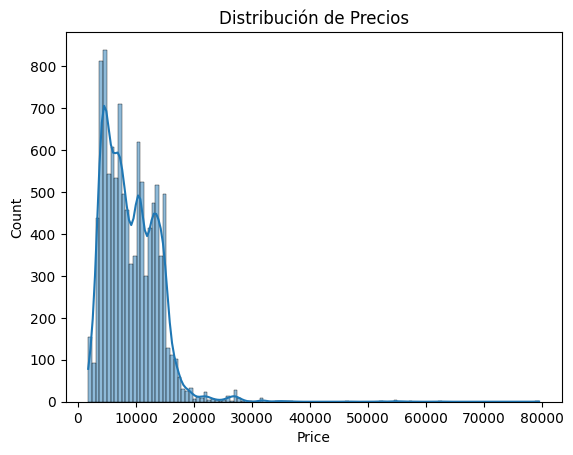

In [ ]:
#Visualización de la distribución de precios
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Price'], kde=True)
plt.title('Distribución de Precios')
plt.show()

#Objetivo:
#Visualizar la distribución de los precios de los vuelos para comprender mejor cómo están distribuidos los datos.

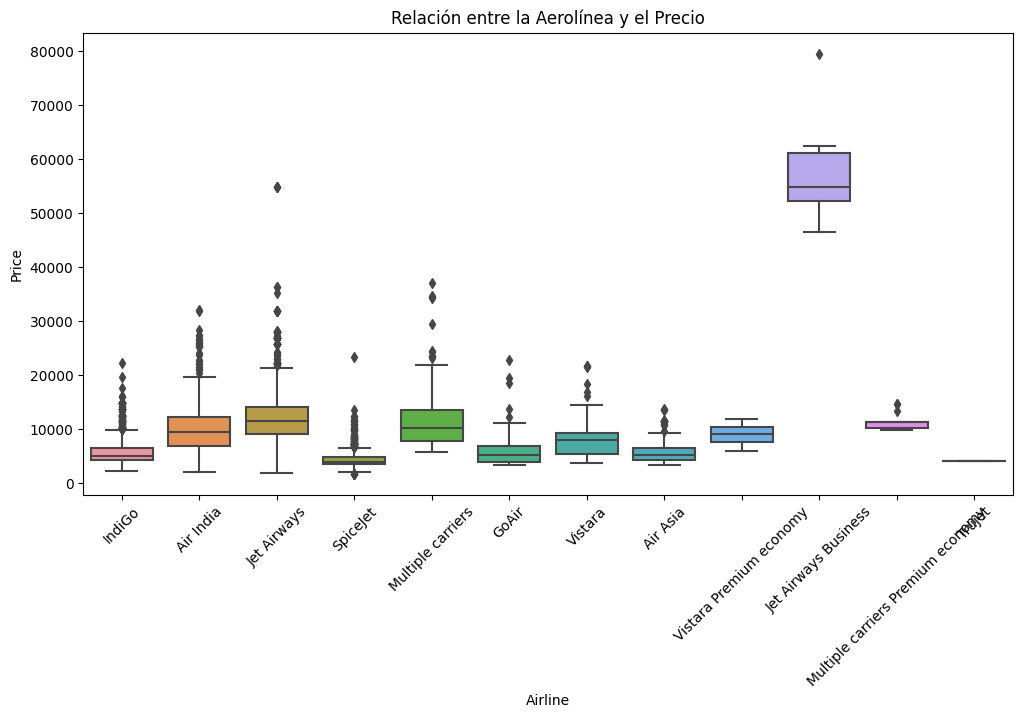

In [ ]:
#Relacion entre aerolinea y precio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.title('Relación entre la Aerolínea y el Precio')
plt.xticks(rotation=45)
plt.show()
#Objetivo:
#Identificar patrones o diferencias en los precios de los vuelos en función de la aerolínea a través de un diagrama de caja.


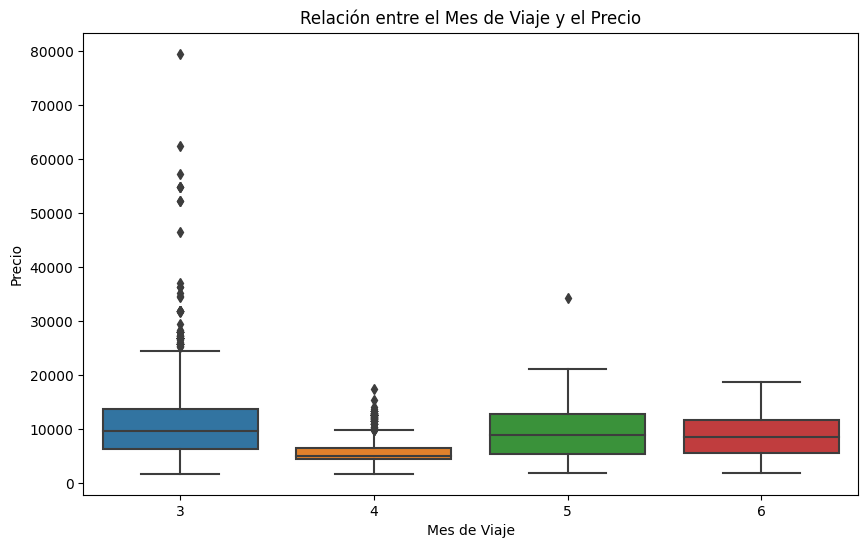

In [ ]:
# Relación entre el mes de viaje y el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Journey_month', y='Price', data=data)
plt.title('Relación entre el Mes de Viaje y el Precio')
plt.xlabel('Mes de Viaje')
plt.ylabel('Precio')
plt.show()

In [ ]:
# Formateo de la duración en minutos
def convert_to_minutes(duration):
    try:
        hours, minutes = 0, 0

        if 'h' in duration:
            hours = int(duration.split('h')[0])

        if 'm' in duration:
            minutes = int(duration.split('m')[0].split()[-1])

        return hours * 60 + minutes
    except:
        return None

data['Duration_minutes'] = data['Duration'].apply(convert_to_minutes)
#Objetivo:
#Crear una nueva característica ('Duration_minutes') que represente la duración del vuelo en minutos, simplificando el formato original


In [ ]:
print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  Duration_minutes  
0           24              3             

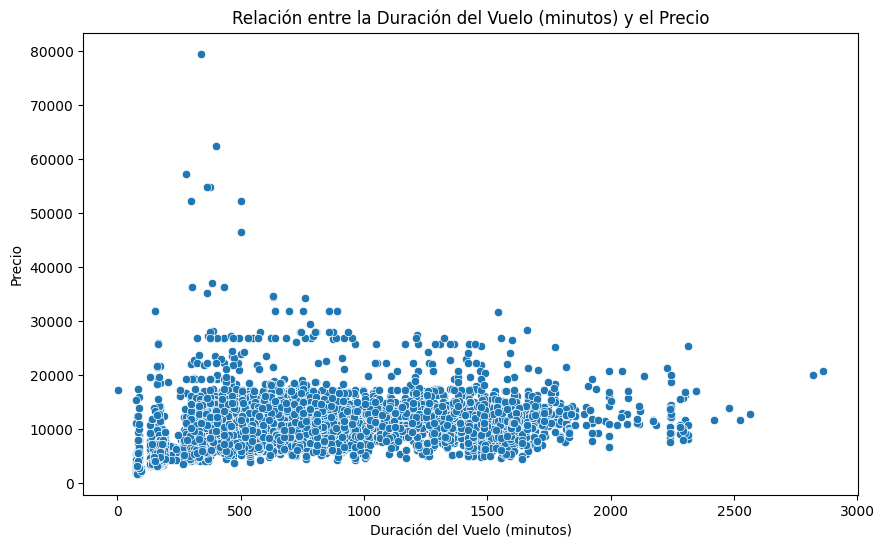

In [ ]:
#Relacion duracion minutos y precio

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_minutes', y='Price', data=data)
plt.title('Relación entre la Duración del Vuelo (minutos) y el Precio')
plt.xlabel('Duración del Vuelo (minutos)')
plt.ylabel('Precio')
plt.show()

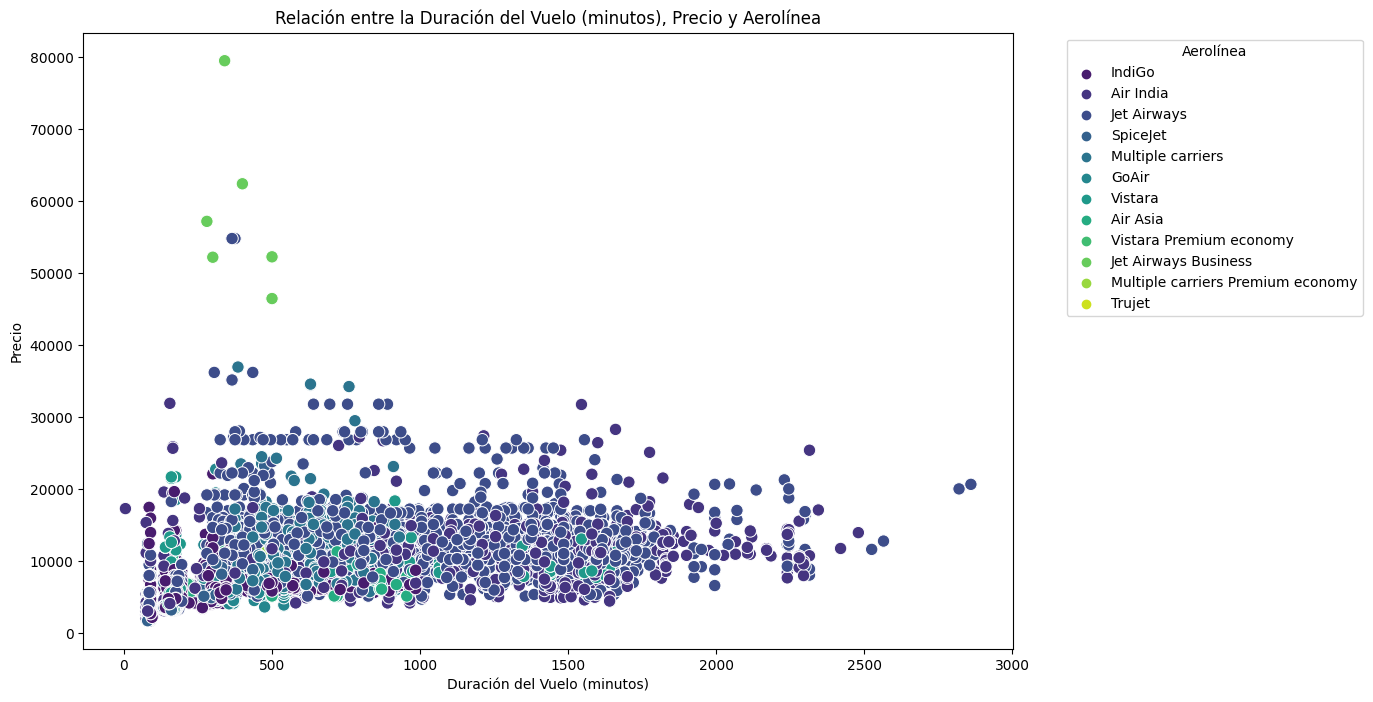

In [ ]:
#Relacion duracion minutos, aerolinea, precio
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration_minutes', y='Price', hue='Airline', data=data, palette='viridis', s=80)
plt.title('Relación entre la Duración del Vuelo (minutos), Precio y Aerolínea')
plt.xlabel('Duración del Vuelo (minutos)')
plt.ylabel('Precio')
plt.legend(title='Aerolínea', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

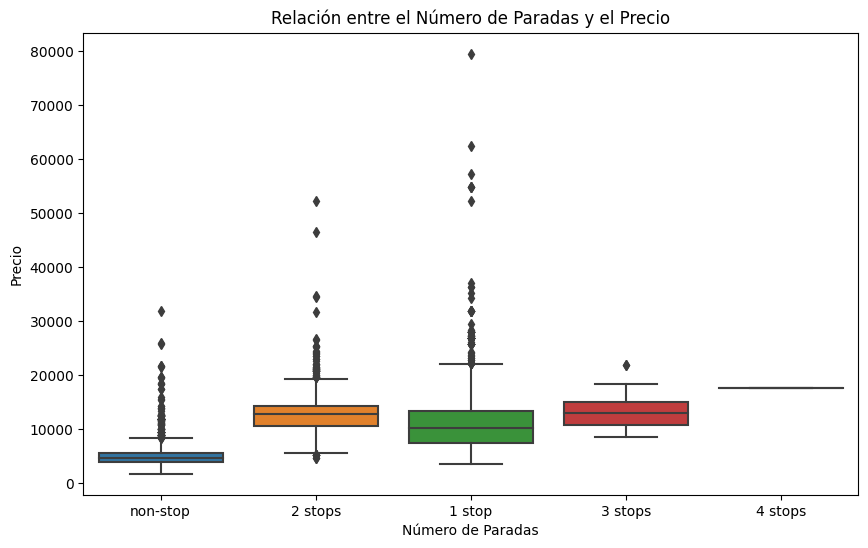

In [ ]:
#relacion entre numero de paradas y precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Relación entre el Número de Paradas y el Precio')
plt.xlabel('Número de Paradas')
plt.ylabel('Precio')
plt.show()

In [ ]:
#Se requiere clasificacion de los vuelos en funcion de horarios: Mañana, tarde y noche
# Convertir la columna 'Dep_Time' a tipo de dato datetime
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

# Función para clasificar el horario del vuelo
def classify_time_of_day(dep_time):
    if 5 <= dep_time.hour < 12:
        return 'mañana'
    elif 12 <= dep_time.hour < 18:
        return 'tarde'
    else:
        return 'noche'

# Crear una nueva columna 'Time_of_Day'
data['Time_of_Day'] = data['Dep_Time'].apply(classify_time_of_day)


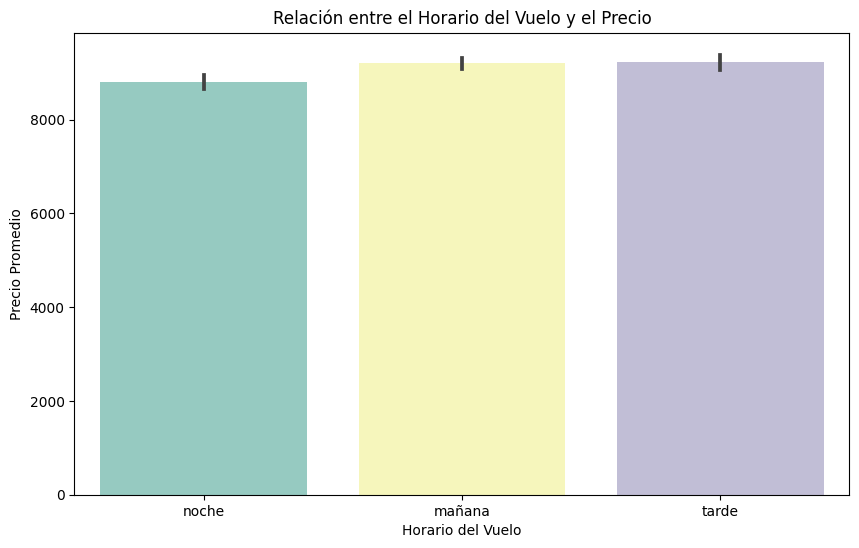

In [ ]:
#Relacion de precios y horarios anteriormente creados
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_of_Day', y='Price', data=data, palette='Set3')
plt.title('Relación entre el Horario del Vuelo y el Precio')
plt.xlabel('Horario del Vuelo')
plt.ylabel('Precio Promedio')
plt.show()